In [57]:
import os, glob
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs

In [63]:
table = []
inters = ['Li_and_Liu','Four','ATL','TTL']
for inter in inters:
    files = glob.glob(f'./1_hour/*_{inter}*.xml')
    df = pd.DataFrame(columns=['PCUs/hour','Average_Time_Delay','Travel_Time'])
    for i in files:
        travel_time = {}
        delay = {}
        df1 = {'PCUs/hour': i.split('/')[-1].split('_')[0]}
        with open(i, "r") as file:
            content = file.read() # Read each line in the file, readlines() returns a list of lines
            
            content = "".join(content) # Combine the lines in the list into a string

            bs_content = bs(content, "lxml")

        tripinfo = list(bs_content.find_all("tripinfo"))

        for trip in tripinfo:
            try:
                delay[trip["id"].split(".")[1].split("_")[0]].append(float(trip["waitingtime"]))
            except KeyError:
                delay[trip["id"].split(".")[1].split("_")[0]] = []
                delay[trip["id"].split(".")[1].split("_")[0]].append(float(trip["waitingtime"]))
            try:
                travel_time[trip["id"].split(".")[1].split("_")[0]].append(float(trip["duration"]))
            except KeyError:
                travel_time[trip["id"].split(".")[1].split("_")[0]] = []
                travel_time[trip["id"].split(".")[1].split("_")[0]].append(float(trip["duration"]))
        

        for j in delay.keys():
            delay[j] = np.mean(delay[j])
            travel_time[j] = np.mean(travel_time[j])
        df1['Average_Time_Delay'] = np.mean(list(delay.values()))
        df1['Travel_Time'] = np.mean(list(travel_time.values()))

        df=df.append(df1,ignore_index=True)
    df=df.sort_values(by=['PCUs/hour'])
    table.append(df)
table = dict(zip(inters,table))

/home/arms04/.local/lib/python3.8/site-packages/bs4/builder/__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


In [64]:
# labels = ['Three-way','Four-way','Five-way']
labels = ['Li and Liu','Four-way','ATS','FTS']
table

{'Li_and_Liu':   PCUs/hour  Average_Time_Delay  Travel_Time
 1       150            0.160000    45.013623
 3       200            0.160000    45.042737
 0       250            0.160000    45.345352
 4       300            0.160000    45.857859
 2       350            0.166102    46.341204,
 'Four':   PCUs/hour  Average_Time_Delay  Travel_Time
 2       150            0.877980   108.277796
 3       200            1.347918   112.714082
 4       250            2.424826   117.415794
 1       300            4.451084   128.228934
 0       350            5.615040   132.519881,
 'ATL':   PCUs/hour  Average_Time_Delay  Travel_Time
 2       150            6.218729    80.096826
 3       200            6.613425    81.298269
 1       250            6.203438    81.391639
 4       300            6.496004    82.718392
 0       350            6.545563    83.525720,
 'TTL':   PCUs/hour  Average_Time_Delay  Travel_Time
 4       150            9.407764    83.559277
 2       200           10.488417    85.72

### Plotting Average time delay bar graph

[-0.2        -0.06666667  0.06666667  0.2       ]
4


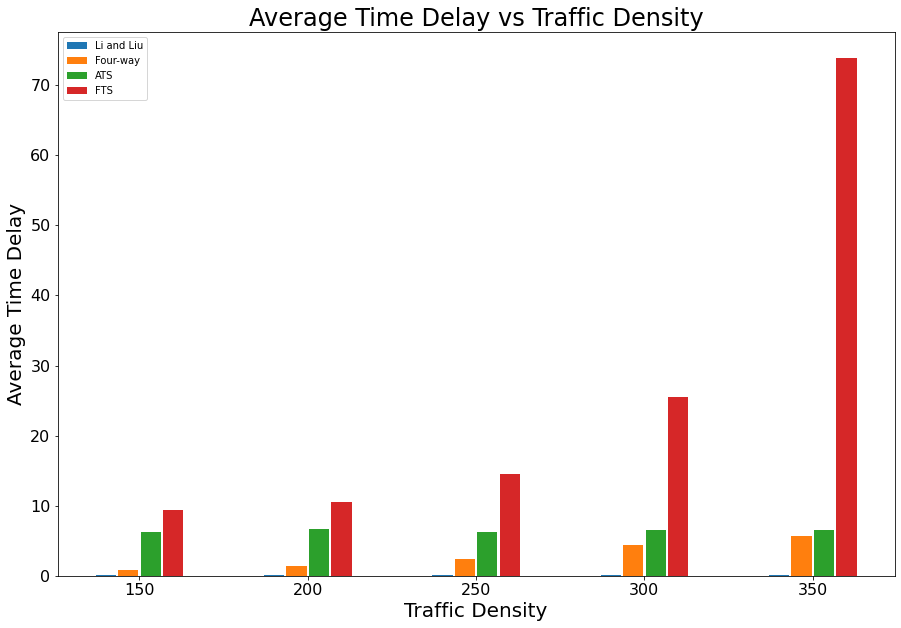

In [65]:
import numpy as np 
import matplotlib.pyplot as plt 
  
# X = list(table[0]['PCUs/hour'])
fig,ax = plt.subplots()
fig.set_size_inches(15,10)
mosad = np.linspace(-0.2,0.2,4)
print(mosad)
count = 0
for i, j in table.items():
    X_axis = np.arange(len(list(j['PCUs/hour'])))
    ax.bar(X_axis + mosad[count], list(j['Average_Time_Delay']), 0.12, label = f'{labels[count]}')
    count += 1
    # plt.bar(X_axis + 0.2, list(j['Travel_Time']), 0.4, label = f'{i}')
print(count)
X = list(table['Four']['PCUs/hour'])
ax.set_xticks(X_axis, X)
# ax.set_yticks(ax.get_yticks(),fontsize=16)
ax.tick_params(labelsize = 16)
ax.set_xlabel("Traffic Density",fontsize=20)
ax.set_ylabel("Average Time Delay",fontsize=20)
ax.set_title("Average Time Delay vs Traffic Density",fontsize=24)
ax.legend()
plt.show()
fig.savefig("Delay_comparision.png", dpi = 100,bbox_inches='tight', pad_inches=0.1,facecolor='w')

### Plotting Average Travel Time Bar graph

[-0.2        -0.06666667  0.06666667  0.2       ]
4


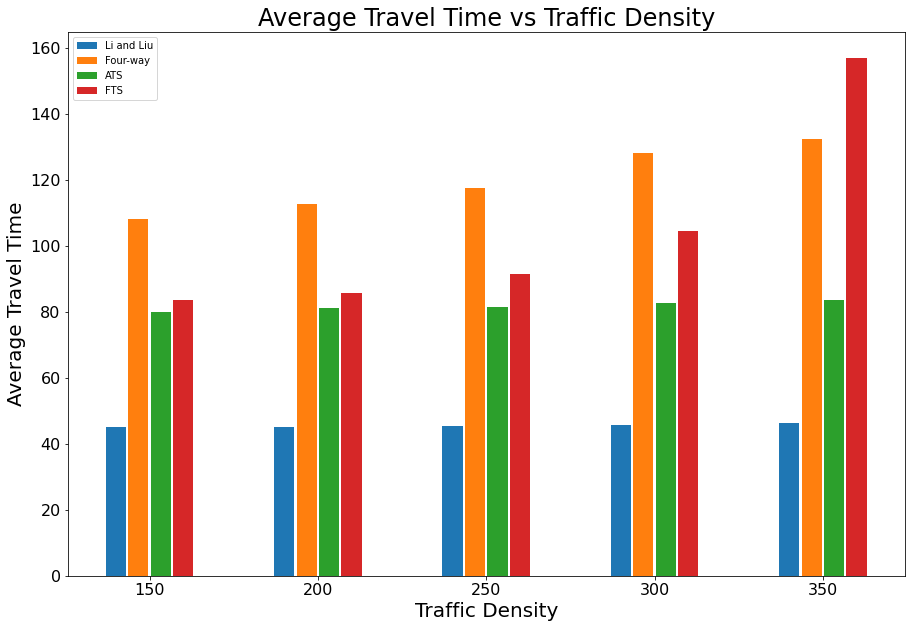

In [67]:
import numpy as np 
import matplotlib.pyplot as plt 
  
# X = list(table[0]['PCUs/hour'])
fig,ax = plt.subplots()
fig.set_size_inches(15,10)
mosad = np.linspace(-0.2,0.2,4)
print(mosad)
count = 0
for i, j in table.items():
    X_axis = np.arange(len(list(j['PCUs/hour'])))
    ax.bar(X_axis + mosad[count], list(j['Travel_Time']), 0.12, label = f'{labels[count]}')
    count += 1
    # plt.bar(X_axis + 0.2, list(j['Travel_Time']), 0.4, label = f'{i}')
print(count)
X = list(table['Four']['PCUs/hour'])
ax.set_xticks(X_axis, X)
ax.tick_params(labelsize = 16)
ax.set_xlabel("Traffic Density",fontsize=20)
ax.set_ylabel("Average Travel Time",fontsize=20)
ax.set_title("Average Travel Time vs Traffic Density",fontsize=24)
ax.legend()
plt.show()
fig.savefig("travel_time_Comparision.png", dpi = 100,bbox_inches='tight', pad_inches=0.1,facecolor='w')